In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [6]:
gold_data=pd.read_csv("/content/gld_price_data.csv")

In [7]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [8]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [9]:
gold_data.shape

(2290, 6)

In [10]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [11]:
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [12]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [13]:
X=gold_data.drop(['GLD','Date'],axis=1)
Y=gold_data['GLD']

In [14]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [15]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [16]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [17]:
x_train

,SPX,USO,SLV,EUR/USD
486,1165.810059,39.560001,16.600000,1.356705
31,1349.989990,75.930000,16.952000,1.467610
1754,2041.890015,10.740000,13.080000,1.087453
1490,1862.760010,31.100000,16.670000,1.280442
1526,2026.140015,23.280001,16.370001,1.239495
...,...,...,...,...
1033,1461.050049,34.119999,33.570000,1.305824
1731,2023.040039,13.060000,13.590000,1.081502
763,1283.500000,36.009998,34.369999,1.427002
835,1218.280029,35.200001,32.330002,1.386001


In [18]:
y_train

,GLD
486,107.750000
31,89.150002
1754,100.500000
1490,119.220001
1526,117.959999
...,...
1033,171.740005
1731,103.559998
763,148.339996
835,167.380005


In [19]:
x_test

,SPX,USO,SLV,EUR/USD
1255,1692.770020,36.880001,20.980000,1.351698
2100,2425.530029,9.270000,14.990000,1.147394
711,1309.660034,42.049999,36.119999,1.410596
1328,1838.699951,33.689999,19.510000,1.361804
53,1298.420044,82.290001,18.250999,1.563893
...,...,...,...,...
2085,2429.389893,9.520000,16.040001,1.119620
1362,1877.170044,36.299999,20.010000,1.387867
828,1209.880005,33.310001,30.230000,1.376500
567,1089.469971,34.740002,17.530001,1.284406


In [20]:
y_test

,GLD
1255,128.789993
2100,115.620003
711,139.220001
1328,120.930000
53,93.040001
...,...
2085,120.360001
1362,129.130005
828,159.869995
567,117.339996


In [21]:
regressor = RandomForestRegressor(n_estimators=10,random_state=0)


In [22]:
regressor.fit(x_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [23]:
test_data_prediction=regressor.predict(x_test)

In [24]:
print(test_data_prediction)

[127.3689974 116.6779986 140.037001  122.0439996  94.411     155.1279999
 117.3720008 113.3690013 154.3390014 105.7470002 103.0709984 119.883001
  91.5580001 159.6369993 121.5049979 117.0470009  86.9869989  91.7239994
  93.2809998 124.751001   83.2059996 117.9929991 126.537999  170.4459975
 167.0669982 139.9210006 114.2579993 159.9200013 133.6580018 114.9780001
 111.3840006 104.6390022 128.7550001 121.9380006  98.8809998 120.2269995
  87.2399994 115.2380005 126.8879997 140.9699996 107.3340008 131.6960022
 108.0679999 134.5840026 133.3549991 149.1369981 119.7600004 157.587001
 159.177002  127.45      123.6719994 115.2109986 124.1590003 119.3200003
 153.8169996 121.478001  111.8650002  86.976     155.6330001 118.3360009
  88.0379998 114.1169991  82.7489992 146.722998  125.2410005 127.6639978
 125.3109998 120.8649995 168.4460036 121.2249993 125.7740014 171.8799973
 121.0760011 169.4109998 119.2380004 127.0269994 154.9600018 107.6689969
 113.9049995 160.7069992 120.3629998 125.1939987 117.

In [25]:
error_score=metrics.r2_score(y_test,test_data_prediction)
print("R squared error:",error_score)

R squared error: 0.9871029181762448


In [27]:
Y_test=list(y_test)

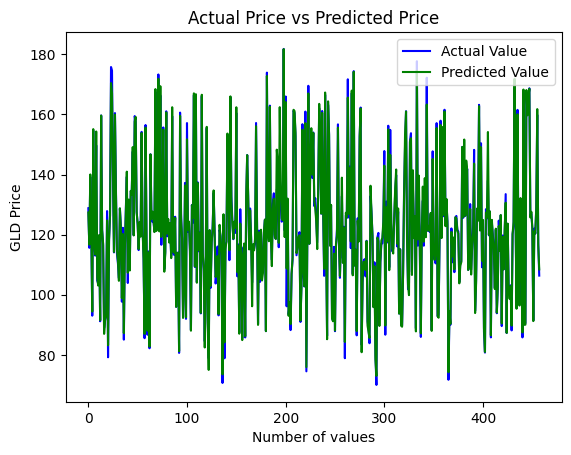

In [28]:
plt.plot(Y_test,color='blue',label='Actual Value')
plt.plot(test_data_prediction,color='green',label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()